# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [14]:
pima_df = pd.read_csv('pima-indians-diabetes+(3).csv')


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [15]:
pima_df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
664,6,115,60,39,0,33.7,0.245,40,1
640,0,102,86,17,105,29.3,0.695,27,0
190,3,111,62,0,0,22.6,0.142,21,0
227,3,162,52,38,0,37.2,0.652,24,1
762,9,89,62,0,0,22.5,0.142,33,0
431,3,89,74,16,85,30.4,0.551,38,0
489,8,194,80,0,0,26.1,0.551,67,0
418,1,83,68,0,0,18.2,0.624,27,0
593,2,82,52,22,115,28.5,1.699,25,0
686,3,130,64,0,0,23.1,0.314,22,0


# 3. Print the datatypes of each column and the shape of the dataset

In [16]:
print('data types:')
print(pima_df.dtypes)


data types:
Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [17]:
print("shape of the data set:")
pima_df.shape

shape of the data set:


(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [18]:
pima_df=pima_df.replace(0,pd.NA).fillna(pima_df.median())

# 5. Print the descriptive statistics of each & every column using describe() function

In [19]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [20]:
pima_df.groupby('class').size()

class
0.0    500
1.0    268
dtype: int64

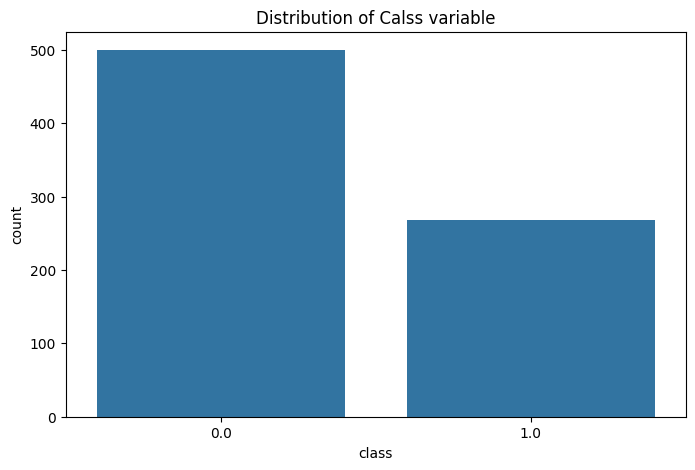

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='class',data=pima_df)
plt.title('Distribution of Calss variable')
plt.show()

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

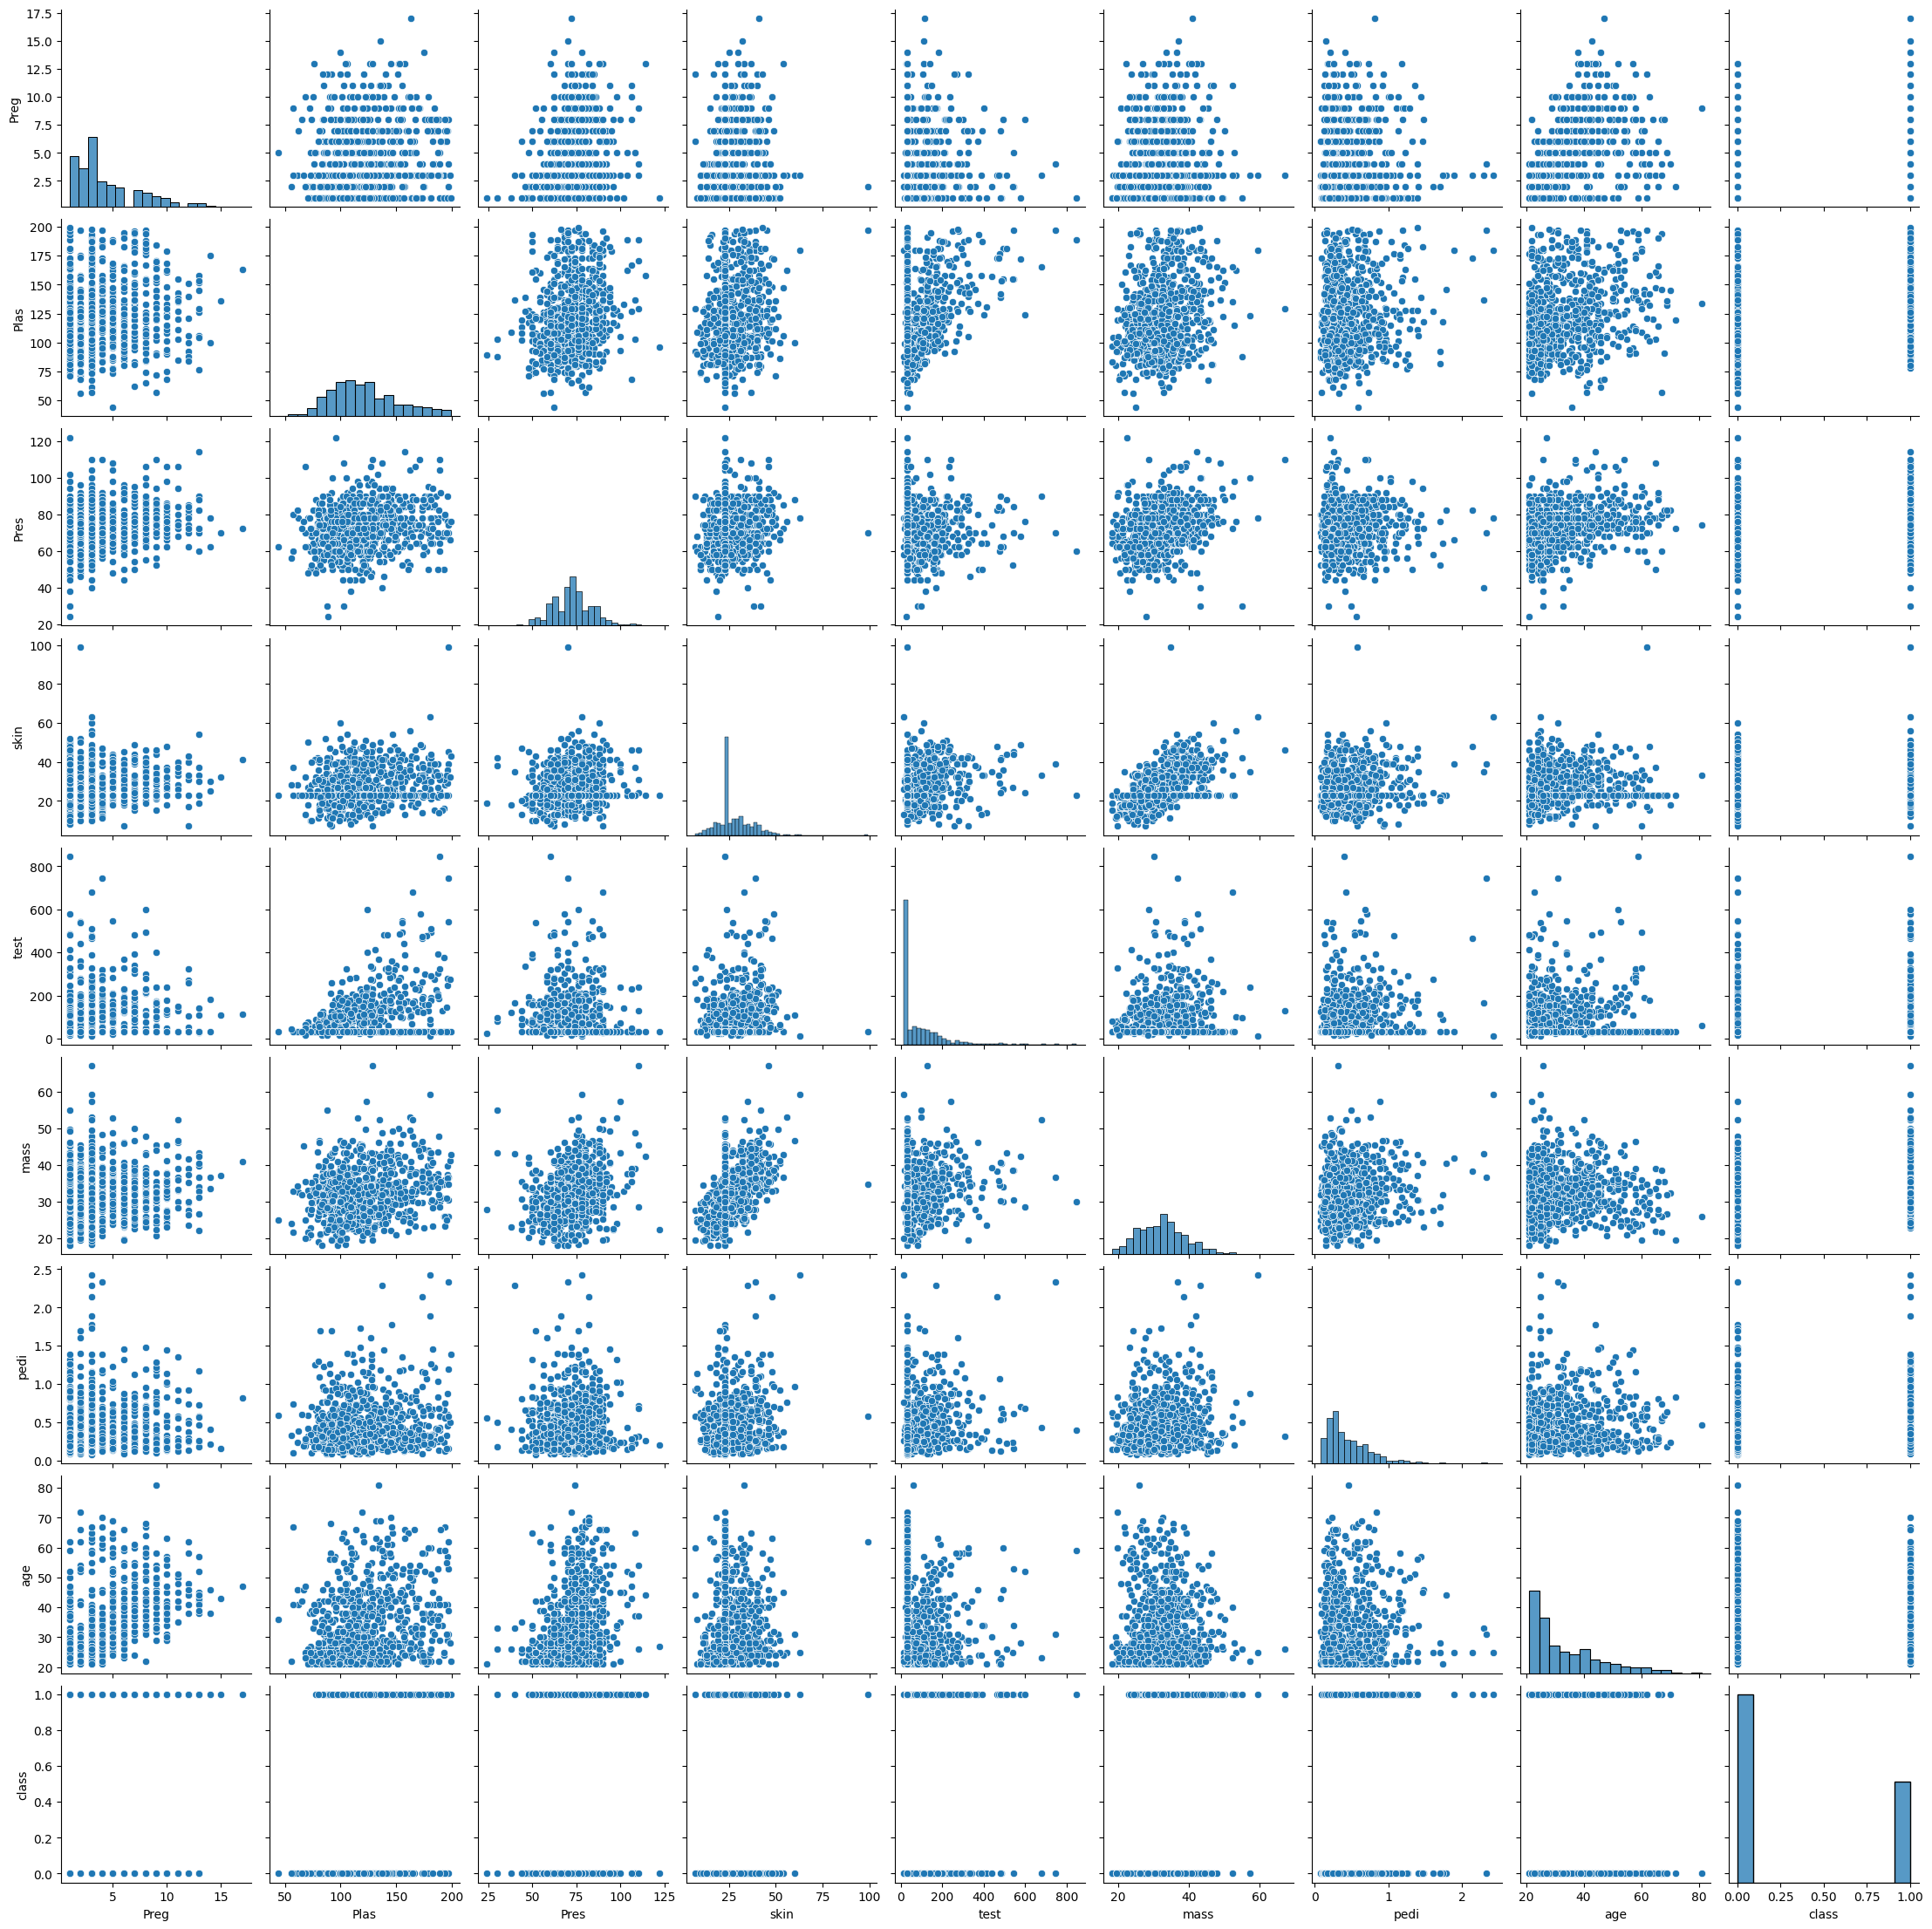

<Figure size 2000x2000 with 0 Axes>

In [22]:
sns.pairplot(pima_df)
plt.figure(figsize=(20,20))
plt.show()

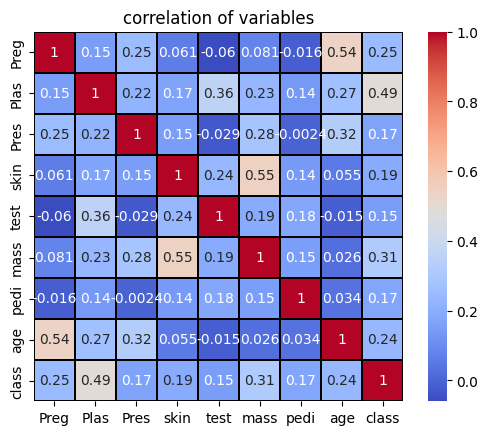

In [23]:
corr_matrix = pima_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",linewidths=0.1,square=True,vmax=1.0,linecolor="black")
plt.title('correlation of variables')
plt.show()
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [24]:
x_train,x_test,y_train,y_test = train_test_split(pima_df.loc[:,pima_df.columns !='class'],pima_df['class'],stratify=pima_df['class'],test_size=0.3,random_state=5)

In [29]:
print(x_train.shape)

(537, 8)


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

# 10. Print the accuracy of the model & print the confusion matrix

In [38]:
y_pred = tree_model.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_pred,y_test))
print('classfication_report:')
print(classification_report(y_pred,y_test))
print('confusion_matrix')
print(confusion_matrix(y_pred,y_test))

accuracy_score:
0.7402597402597403
classfication_report:
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81       158
         1.0       0.58      0.64      0.61        73

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.75      0.74      0.74       231

confusion_matrix
[[124  34]
 [ 26  47]]


# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=40)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_pred_rf,y_test))


accuracy_score:
0.7705627705627706


# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [47]:
from sklearn.ensemble import AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth=5)
ab_model = AdaBoostClassifier(base_model,n_estimators=50,random_state=40)
ab_model.fit(x_train,y_train)
y_pred_ab = ab_model.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_pred_ab,y_test))



accuracy_score:
0.7402597402597403


# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [52]:
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier(max_depth=10)
bagg_model = BaggingClassifier(base_model,n_estimators=10,random_state=40)
bagg_model.fit(x_train,y_train)
y_pred_bagg = bagg_model.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_pred_bagg,y_test))



accuracy_score:
0.7359307359307359


# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
grade_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=40)
grade_model.fit(x_train,y_train)
y_pred_gb = grade_model.predict(x_test)
print('accuracy_score:')
print(accuracy_score(y_pred_gb,y_test))


accuracy_score:
0.7359307359307359
